In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

constant

In [9]:
c = 2.99e+8  #m/s
G = 6.67259e-11  #m^3/(kg*s)
pi = 3.141592653589793
m_n = 1.6749e-27  #mass of neutron (kg)
m_e = 9.109e-31   #mass of an electrol (kg)
h = 6.62607015e-34  #planck constant (kg m^2 s^-1)
h_cut = 1.055e-34  #reduced plank constant (kg m^2 s^-1)

Solar Units

In [10]:
global M0, Rss, epsilon0
M0 = 1.99e+30   #kg
Rss = (2 *G*M0)/(c**2)  # m
R0 = 6.96e+5  #km schwarz's radius
epsilon0 = (M0 * (c ** 2)) / (4/3 * pi * (Rss ** 3)) #kg m s^-2

Modeling

In [21]:
global Model
Model_type = input("please input the model type: \n").upper()
Model = Model_type

please input the model type: 
TOV


Internal Structure Equations(I take out the 3 for scaling)

In [22]:
def dr_dr():
    dr = 1/100   #to make dimentionless
    return dr
def dm_dr(r,epsilon):
    M = (r ** 2) * epsilon
    return M
def dp_dr(epsilon, m ,r, p, model):
    if model == "TOV":   #relativistic
        y = (-0.5*(epsilon*m)/(r**2))*(1+p/epsilon)*(1+((r**3)*p)/m)*((1-m/r)**-1)
        return y

Polytrope

In [23]:
def p_(epsilon):  #(ultra relativistic but without 1/3 due to scaling)
    p = epsilon-1.0e-1
    return p

data1 = []
epsilon_c = 0.09
while epsilon_c < 0.5:
    epsilon_c *= 1.01
    R = 0
    M = 0
    P = p_(epsilon_c)
    epsilon = epsilon_c
    
    while P > 0:
        R += dr_dr()
        M += (dm_dr(R,epsilon)) * dr_dr()
        P += (dp_dr(epsilon_c, M, R, P, "TOV")) * dr_dr()
        epsilon = (P + 1.0e-1)
    data1.append([epsilon_c, R, M, p_(epsilon_c)])
data1 = np.array(data1)

if Model == "TOV":
    print("Initializing TOV varient \n ......Printing array.....")
else:
    print("Initializing CLSC variant \n .....Printing array......")
print(data1)


Initializing TOV varient 
 ......Printing array.....
[[ 9.09000000e-02  0.00000000e+00  0.00000000e+00 -9.10000000e-03]
 [ 9.18090000e-02  0.00000000e+00  0.00000000e+00 -8.19100000e-03]
 [ 9.27270900e-02  0.00000000e+00  0.00000000e+00 -7.27291000e-03]
 [ 9.36543609e-02  0.00000000e+00  0.00000000e+00 -6.34563910e-03]
 [ 9.45909045e-02  0.00000000e+00  0.00000000e+00 -5.40909549e-03]
 [ 9.55368136e-02  0.00000000e+00  0.00000000e+00 -4.46318645e-03]
 [ 9.64921817e-02  0.00000000e+00  0.00000000e+00 -3.50781831e-03]
 [ 9.74571035e-02  0.00000000e+00  0.00000000e+00 -2.54289649e-03]
 [ 9.84316745e-02  0.00000000e+00  0.00000000e+00 -1.56832546e-03]
 [ 9.94159913e-02  0.00000000e+00  0.00000000e+00 -5.84008713e-04]
 [ 1.00410151e-01  6.80000000e-01  1.07306736e-02  4.10151200e-04]
 [ 1.01414253e-01  1.24000000e+00  6.46845088e-02  1.41425271e-03]
 [ 1.02428395e-01  1.58000000e+00  1.34016594e-01  2.42839524e-03]
 [ 1.03452679e-01  1.84000000e+00  2.12224654e-01  3.45267919e-03]
 [ 1.0448

Plots

Mass vs. Radius

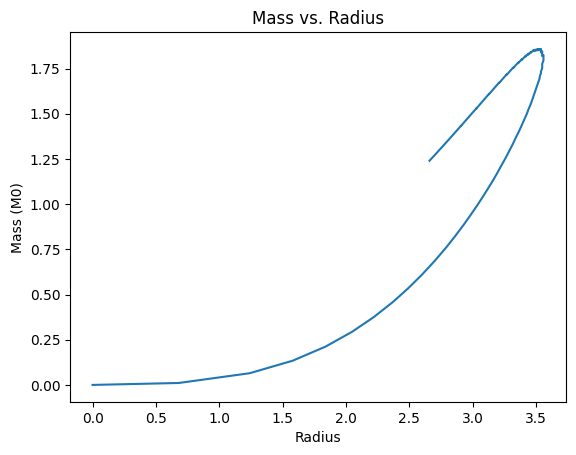

In [26]:
plt.plot(data1.T[1], data1.T[2])
plt.title("Mass vs. Radius")
plt.xlabel("Radius")
plt.ylabel("Mass (M0)")
plt.show()

Pressure vs. Radius

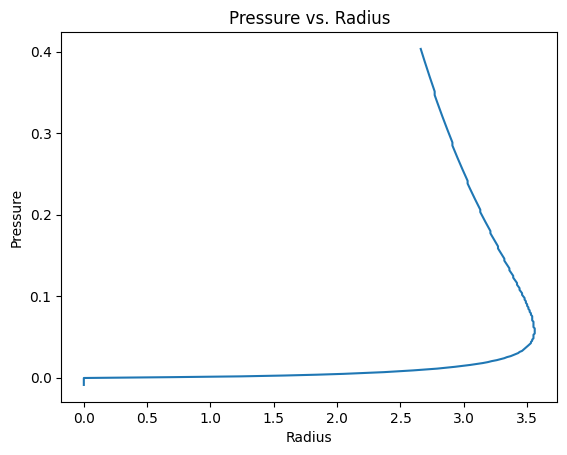

In [27]:
plt.plot(data1.T[1], data1.T[3])
plt.title("Pressure vs. Radius")
plt.xlabel("Radius")
plt.ylabel("Pressure")
plt.show()

Mass & Radius vs. ε_c

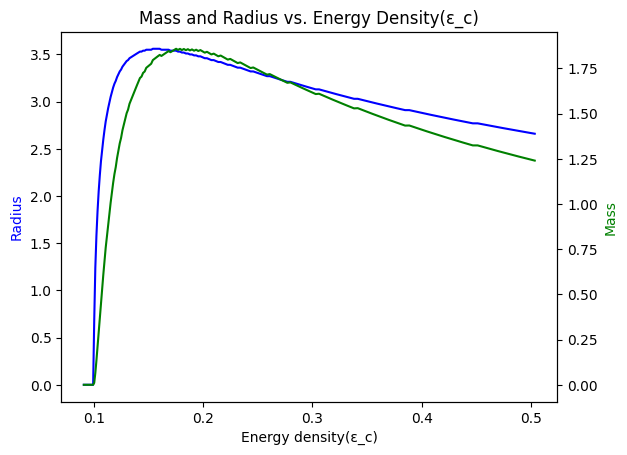

In [30]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data1.T[0], data1.T[1], "b-")
ax2.plot(data1.T[0], data1.T[2], "g-")
plt.title("Mass and Radius vs. Energy Density(ε_c)")
ax1.set_xlabel("Energy density(ε_c)")
ax1.set_ylabel("Radius", color = "b")
ax2.set_ylabel("Mass", color = "g")
plt.show()


Pressure vs. Energy Density

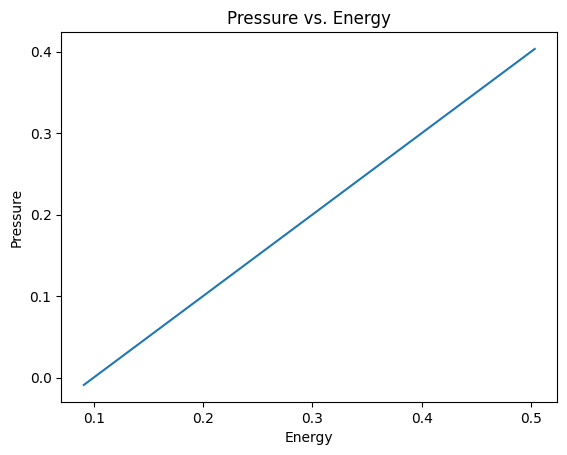

In [31]:
plt.plot(data1.T[0], data1.T[3])
plt.title("Pressure vs. Energy")
plt.xlabel("Energy")
plt.ylabel("Pressure")
plt.show()


 Generating Dataframe into Excel file:

In [35]:
print("......printing dataframe into excel file.......")
df = pd.DataFrame(data1, columns = ["Energy Density", "Radius", "Mass", "Pressure"])
df.to_excel("ultra-relativistic data.xlsx")

print("...components....")

Energydensity_f = data1[58][0] * epsilon0
Radius_f = data1[58][1] * Rss
Mass_f = data1[58][2]
Pressure_f =  data1[58][3] * epsilon0
print(f"Energy density = {Energydensity_f} N \n Radius = {Radius_f} m \n"
     f"Mass ={Mass_f} M0 \n Pressure = {Pressure_f} N/m^2")


......printing dataframe into excel file.......
...components....
Energy density = 2.623040518699227e+35 N 
 Radius = 10545.410466325784 m 
Mass =1.8191823226399584 M0 
 Pressure = 1.002718115845623e+35 N/m^2
